In [1]:
%config Completer.use_jedi = False

In [2]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
THRESHOLD = 74

In [4]:
start = time.time()
data = pd.read_csv('train.csv')
end = time.time()
print(end - start)


1.16072678565979


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

In [6]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14029,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27096,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17341,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35203,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5141,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

[  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 239 159   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 239 159   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  23 136   0   0   0   0   0   0  12 241
 159   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 165 232  15   0   0   0   0   0  64 254 159   0   

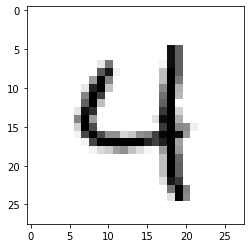

In [8]:
print(data.iloc[0].to_numpy())
pic = data.iloc[0].to_numpy()
plt.imshow(pic[1:].reshape(28,28), cmap="binary")


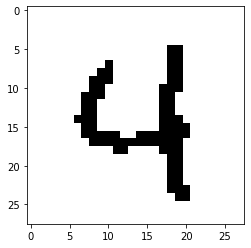

In [9]:

for i in range(1,len(pic)-1):
    if pic[i] >THRESHOLD:
        pic[i]=255
    else:
        pic[i]=0
plt.imshow(pic[1:].reshape(28,28), cmap="binary")

In [10]:
X = data.iloc [:,1:]#Frame (42000, 784)
y = data ["label"]#series (42000,)


In [11]:
from sklearn.model_selection import train_test_split 
# Split the dataset into a training set and a validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#train 29400, 0.70 of the data
#test 6300, 0.3 of the data
#validation 6300, 0.21 of the data 

print(len(X_train),len(y_train))
print(len(X_val),len(y_val))
print(len(X_test),len(y_test))


sample = {"train": range(0,700), "val":range(700,850), "test":range(850,1000)}

X_train_LASSO, X_test_LASSO, X_val_LASSO= X.iloc[sample["train"]], X.iloc[sample["test"]], X.iloc[sample["val"]]
y_train_LASSO, y_test_LASSO, y_val_LASSO= y.iloc[sample["train"]], y.iloc[sample["test"]], y.iloc[sample["val"]]

print(X_train.iloc[1].to_numpy(), len(X_train.iloc[1].to_numpy()))

29400 29400
6300 6300
6300 6300
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32
 233 141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 133 254 249  63   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  15 243 254 254  87   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  17 254 254 254  87   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  52 254 25

In [12]:
type(X_train)
X_train.shape

(29400, 784)

In [13]:
# Applying the threshold condition
X_train=X_train.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_test=X_test.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_val=X_val.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')

X_train_LASSO=X_train_LASSO.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_test_LASSO=X_test_LASSO.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_val_LASSO=X_val_LASSO.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
#print(X_train.iloc[1].to_numpy())

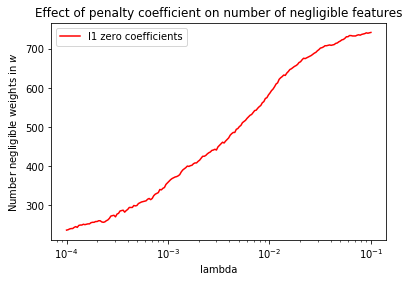

In [14]:
########### Feature selection
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

l_range = (-4, -1)
l1_regs = []
lambdas = np.logspace(*l_range, num=200)  # candidate lambdas
for l in lambdas:
    reg = Lasso(alpha=l, max_iter=20000).fit(X_train_LASSO, y_train_LASSO)
    l1_regs.append(reg)

# plot the data
fig, axs = plt.subplots()
plt.setp(axs, xscale='log', xticks=[10**x for x in range(*l_range)], xlabel='lambda')
axs.set_title("Effect of penalty coefficient on number of negligible features")
axs.set_ylabel('Number negligible weights in $w$')
axs.plot(lambdas, [sum(r.coef_ == 0) for r in l1_regs], color='red', label='l1 zero coefficients')
axs.legend()


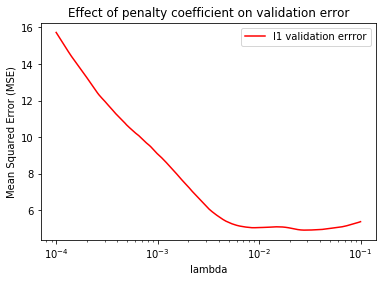

In [15]:
fig, axs = plt.subplots()
plt.setp(axs, xscale='log', xticks=[10**x for x in range(*l_range)], xlabel='lambda')
axs.set_title('Effect of penalty coefficient on validation error')
axs.set_ylabel('Mean Squared Error (MSE)')
error = [mean_squared_error(y_val_LASSO, reg.predict(X_val_LASSO)) for reg in l1_regs]
axs.plot(lambdas, error , color='red', label='l1 validation errror')
axs.legend()

In [16]:
index = np.argmin(error)
sel_ = SelectFromModel(l1_regs[index])
sel_.fit(X_train_LASSO, y_train_LASSO)
#sel_.get_support()
selected_feat = X_train_LASSO.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 784
selected features: 95
features with coefficients shrank to zero: 689


In [17]:
X_train = sel_.transform(X_train)

In [18]:
X_val = sel_.transform(X_val)

In [19]:
X_test = sel_.transform(X_test)

<div class=" alert alert-warning"> 

- Training set size: 29400 
- Test set size: 6300 
- validation set size: 6300 
    
</div>

In [20]:
from sklearn.neural_network import MLPClassifier
num_layers_clf = [1]+[i*2 for i in range (1,6)]    # number of hidden layers,
num_neurons = 16       # number of neurons of each layer, we fix this to 16 in this task

hidden_layers = tuple([num_neurons]*num_layers_clf[1]) #16x16 for test


In [21]:
start_time = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes= hidden_layers, max_iter = 2000, learning_rate_init = 0.01, random_state = 42, activation = 'relu')
mlp_clf.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 28.929052591323853 seconds ---


In [22]:
from sklearn.metrics import accuracy_score
y_pred_train = mlp_clf.predict(X_train)
tr_acc = accuracy_score(y_train, y_pred_train)
print(tr_acc)

0.9322448979591836


In [23]:
y_train


41192    9
30054    1
8120     1
40698    8
29286    5
        ..
14788    6
26949    6
35855    5
31368    3
28534    9
Name: label, Length: 29400, dtype: int64

In [24]:
y_pred_val = mlp_clf.predict(X_val)
tr_acc = accuracy_score(y_val, y_pred_val)
print(tr_acc)

0.9063492063492063


In [25]:
y_pred_test = mlp_clf.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_test)
print(tr_acc)

0.9084126984126984
